# Data Extraction

### Import Packages for Data Extraction

In [261]:
import pandas as pd
import re

### Specify the longitude range

In [262]:
longitude=["66.5", "67.5", "68.5", "69.5", "70.5",
         "71.5", "72.5", "73.5", "74.5", "75.5",
         "76.5", "77.5", "78.5", "79.5", "80.5",
         "81.5", "82.5", "83.5", "84.5", "85.5",
         "86.5", "87.5", "88.5", "89.5", "90.5",
         "91.5", "92.5", "93.5", "94.5", "95.5",
         "96.5", "97.5", "98.5", "99.5", "100.5"]

### Read data from files and store in data list

In [263]:
data=[]  # read data in every file and store data in data list
for year in range(1951,2016):
    file=open("rf_"+str(year)+".TXT",'r')
    lines=file.readlines()
    data.append(lines)
    file.close()

### Extract Useful Rainfall data

In [264]:
row=[]
for file in data:
    for line in file:
        list1=line.split()
        if re.search(r'^19|^20', line):
            date=list1[0]+"-"+list1[1]+"-"+list1[2]
            continue
        elif re.search(r'^66\.5E|^38\.5N|^37\.5N|^7\.5N|^6\.5N|^\n$', line):
            continue
        else:
            lat=list1[0]
            count=0
            for num in list1[1:]:
                if num=='-99.9':
                    count+=1
                else:
                    row.append([date,lat,longitude[count],num])
                    count+=1

### Put data into a dataframe

In [265]:
#create data frame
df=pd.DataFrame(row)
df.columns=['Date','Latitude','Longitude','rainfall']
len(df)

8475537

In [266]:
df.tail()

,Date,Latitude,Longitude,rainfall
8475532,2015-12-31,9.5,78.5,0.0
8475533,2015-12-31,9.5,79.5,0.0
8475534,2015-12-31,8.5,76.5,0.0
8475535,2015-12-31,8.5,77.5,0.3
8475536,2015-12-31,8.5,78.5,1.5


### Selecting Year only data

In [267]:
# create year column
year=[]
month=[]
for date in df["Date"].tolist():
    year.append(date[0:4])
df['Year']=year

In [268]:
df.tail()

,Date,Latitude,Longitude,rainfall,Year
8475532,2015-12-31,9.5,78.5,0.0,2015
8475533,2015-12-31,9.5,79.5,0.0,2015
8475534,2015-12-31,8.5,76.5,0.0,2015
8475535,2015-12-31,8.5,77.5,0.3,2015
8475536,2015-12-31,8.5,78.5,1.5,2015


In [269]:
year_num='1981' #replace 1981 for the desired year
df_1981=df[df['Year']==year_num]

In [270]:
df_1981.head()

,Date,Latitude,Longitude,rainfall,Year
3912006,1981-01-01,36.5,72.5,0.0,1981
3912007,1981-01-01,36.5,73.5,0.0,1981
3912008,1981-01-01,36.5,74.5,0.0,1981
3912009,1981-01-01,36.5,75.5,0.0,1981
3912010,1981-01-01,36.5,78.5,0.0,1981


# Data Analysis

### Rainfall average of yearly quarters, graph line graph

In [271]:
ave_rainfall_year=[] #calculate rainfall mean for each year and store in ave_rainfall_year
for current_year in range(1951,1997): 

    #only includes from year 1951 to 1996 because the number of collecting station goes down after 1996 
    
    current_year=str(current_year)
    df_cal=df[df['Year']==current_year]
    
    data1=df_cal[['rainfall']].astype(float)
    ave_rainfall_year.append(sum(data1['rainfall'].tolist())/len(data1['rainfall'].tolist()))

In [272]:
ave_rainfall_year

[2.8089912129235373,
 3.0648260397054576,
 3.4699052223629203,
 3.5173178312420577,
 3.8593852883618776,
 3.88788247539451,
 3.3734822148037367,
 3.8510625071946403,
 3.9299297801311948,
 3.333967794768145,
 4.02311730171524,
 3.483989102490299,
 3.4295169026514802,
 3.6028830111279273,
 2.983090441656137,
 3.241357584129536,
 3.435045470242898,
 3.1673784267805165,
 3.3861601626952185,
 3.636904186332078,
 3.5943471087064975,
 2.9073211798380525,
 3.6682613867464893,
 3.3115736157476796,
 3.843858639346099,
 3.4113299964794295,
 3.761697555734635,
 3.5842960745942056,
 3.1170737884194746,
 3.4547787420979073,
 3.5469966616783615,
 3.283712060166501,
 3.8448064157169584,
 3.445124825886614,
 3.4037573385518622,
 3.2253313380146236,
 3.2201319980046827,
 3.8011212135127215,
 3.199812747016624,
 3.9810291239783577,
 3.4067917577990294,
 3.204733587424022,
 3.6386255324047476,
 3.705918422163392,
 3.496397682360601,
 3.3401692917604255]

In [273]:
#import plotting package
import matplotlib.pyplot as plt

In [274]:
#create new data frame for analysis
year_total=[]
for i in range(1951,1997):
    year_total.append(i)
dic={"mean_rain":ave_rainfall_year,"year":year_total}
df_this=pd.DataFrame(dic)

In [275]:
df_this.head()

,mean_rain,year
0,2.808991,1951
1,3.064826,1952
2,3.469905,1953
3,3.517318,1954
4,3.859385,1955


Text(0, 0.5, 'Mean_Rainfall')

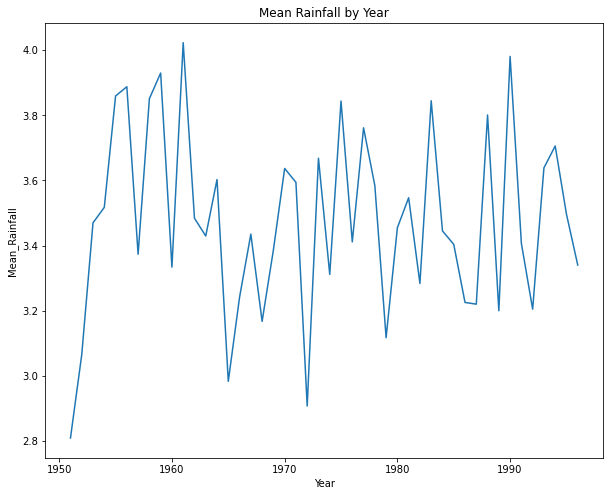

In [276]:
#plot line graph
plt.figure(figsize=(10,8))
plt.plot('year','mean_rain',data=df_this)
plt.title("Mean Rainfall by Year")
plt.xlabel('Year')
plt.ylabel('Mean_Rainfall')

We can see a lot of fluctuations between different years, so a savgol_filter is applied to smooth out the curve. However, a general trend of increment in mean_rainfall can be roughly observed.

Text(0, 0.5, 'Mean_Rainfall')

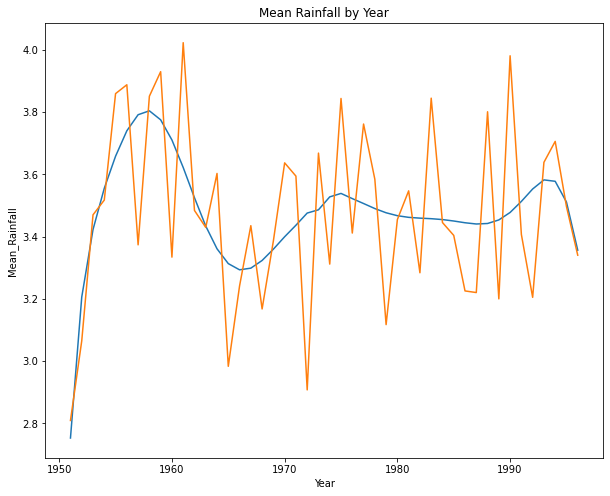

In [291]:
from scipy.signal import savgol_filter
yhat_mean = savgol_filter(df_this['mean_rain'], 41, 10) #apply filter
df_this['smoothed_mean']=yhat_mean
plt.figure(figsize=(10,8))
plt.plot('year','smoothed_mean',data=df_this)
plt.plot('year','mean_rain',data=df_this)
plt.title("Mean Rainfall by Year")
plt.xlabel('Year')
plt.ylabel('Mean_Rainfall')

### Use Machine Learning Algorithms to Evaluate Trend and Build Predictive Models

In [292]:
#import packages
from sklearn import preprocessing
import numpy as np

In [293]:
X=df_this[['year']]
y=df_this['smoothed_mean'].values

In [294]:
#split into training set and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (36, 1) (36,)
Test set: (10, 1) (10,)


In [295]:
#train regression model
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit (X_train, y_train)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [0.00181503]
Intercept:  -0.10338770444288459


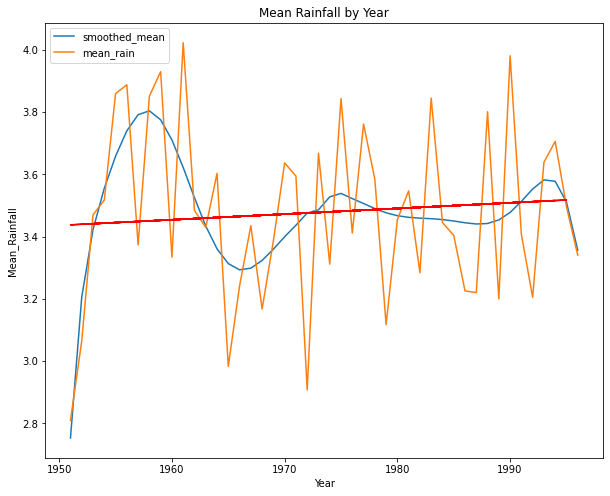

In [296]:
#plot trend line
plt.figure(figsize=(10,8))
plt.plot('year','smoothed_mean',data=df_this)
plt.plot('year','mean_rain',data=df_this)
plt.plot(X_train, regr.coef_[0]*X_train + regr.intercept_, '-r')
plt.title("Mean Rainfall by Year")
plt.xlabel('Year')
plt.ylabel('Mean_Rainfall')
plt.legend()

In [297]:
from sklearn.metrics import r2_score

y_predict= regr.predict(X_test)

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_predict - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_predict - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_predict, y_test))

Mean absolute error: 0.14
Residual sum of squares (MSE): 0.03
R2-score: -50.36


### The predicting R2 indicates that the prediction is not very accurate, this is partly because there are a lot of fluctuations in yearly rainfalls. However, we are able to see a gradual increase in the Mean_rainfall level as the year increases, especially after 1960, where the mean rainfall value does not fluctuate that much. 

## Let's examine the frequencies of VHR (very heavy rainfall) by year 

In [ ]:
#normalize data
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

In [307]:
frequency=[] 
#calculate frequencys of VHR (defined by rainfall more than 15cm) for each year and store in ave_rainfall_year
for current_year in range(1965,1996): 

    #only includes from year 1951 to 1996 because the number of collecting station goes down after 1996 
    
    current_year=str(current_year)
    df_curr=df[df['Year']==current_year]
    data2=df_curr[['rainfall']].astype(float)
    df_greater=data2[data2.rainfall>=15]
    frequency.append(len(df_greater))

In [308]:
#create new data frame for analysis
year_freq=[]
for i in range(1965,1996):
    year_freq.append(i)
dic={"freq":frequency,"year":year_freq}
df_freq=pd.DataFrame(dic)

Text(0, 0.5, 'VHR Frequency')

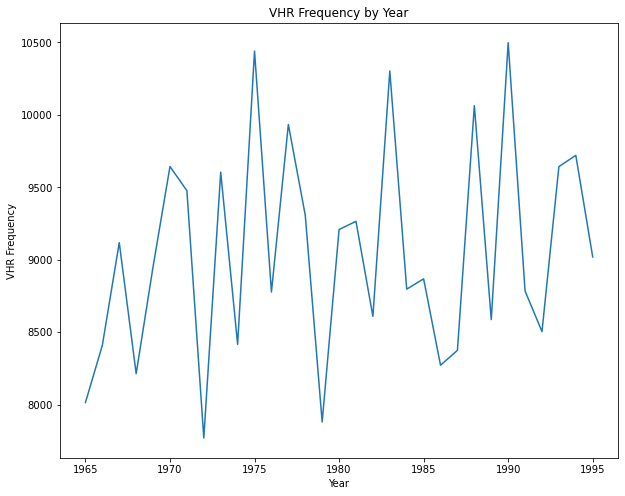

In [309]:
#plot line graph
plt.figure(figsize=(10,8))
plt.plot('year','freq',data=df_freq)
plt.title("VHR Frequency by Year")
plt.xlabel('Year')
plt.ylabel('VHR Frequency')

In [310]:
#Train Linear Model
regr = linear_model.LinearRegression()
regr.fit (df_freq[['year']], df_freq['freq'].values)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)


Coefficients:  [17.97580645]
Intercept:  -26544.774193548365


Text(0, 0.5, 'VHR Frequency')

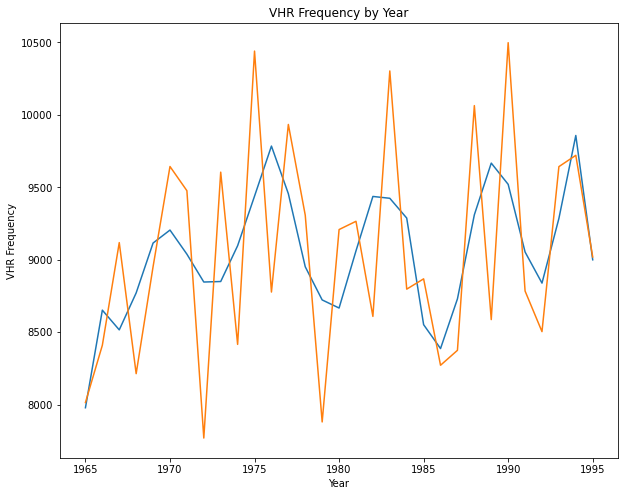

In [324]:
#apply savgol_filter to smooth the curve
from scipy.signal import savgol_filter
yhat_freq = savgol_filter(df_freq['freq'], 21, 10) # window size 27, polynomial order 3
df_freq['smoothed_freq']=yhat_freq
plt.figure(figsize=(10,8))
plt.plot('year','smoothed_freq',data=df_freq)
plt.plot('year','freq',data=df_freq)
plt.title("VHR Frequency by Year")
plt.xlabel('Year')
plt.ylabel('VHR Frequency')

In [325]:
df_freq['smoothed']=yhat
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit (df_freq[['year']],df_freq['smoothed'].values)
# The coefficients after smoothing
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [18.31087334]
Intercept:  -27198.35479019722


# Additional Code for extracting and exporting for analysis in other softwares

## Export CSV

In [149]:
df.to_csv("India_Rainfall_Data.csv",index=False)

In [19]:
df_1981only.to_csv("1981_India_Rainfall_Data.csv",index=False)

In [ ]:
#group 1951 - 1960 rainfall data by date, latitude, longitude and get mean(rainfall)
rainfall_1951_to_1960["rainfall"] = rainfall_1951_to_1960["rainfall"].astype(float)
grouped_1951_to_1960 = rainfall_1951_to_1960.groupby(['Latitude','Longitude'])["rainfall"].mean()
grouped_1951_to_1960 = grouped_1951_to_1960.reset_index()
grouped_1951_to_1960.to_csv("grouped_1951_to_1960.csv",index=False)

In [ ]:
#group 1961 - 1970 rainfall data by date, latitude, longitude and get mean(rainfall)
rainfall_1961_to_1970 = df[(df["Year"].isin(["1961", "1962", "1963", "1964", "1965", "1966", "1967","1968", "1969", "1970"]))]
rainfall_1961_to_1970["rainfall"] = rainfall_1961_to_1970["rainfall"].astype(float)
grouped_1961_to_1970 = rainfall_1961_to_1970.groupby(['Latitude','Longitude'])["rainfall"].mean()
grouped_1961_to_1970 = grouped_1961_to_1970.reset_index()
grouped_1961_to_1970.to_csv("grouped_1961_to_1970.csv",index=False)

In [ ]:
#group 1971 - 1980 rainfall data by date, latitude, longitude and get mean(rainfall)
rainfall_1971_to_1980 = df[(df["Year"].isin(["1971", "1972", "1973", "1974", "1975", "1976", "1977","1978", "1979", "1980"]))]
rainfall_1971_to_1980["rainfall"] = rainfall_1971_to_1980["rainfall"].astype(float)
grouped_1971_to_1980 = rainfall_1971_to_1980.groupby(['Latitude','Longitude'])["rainfall"].mean()
grouped_1971_to_1980 = grouped_1971_to_1980.reset_index()
grouped_1971_to_1980.to_csv("grouped_1971_to_1980.csv",index=False)

In [ ]:
#group 1971 - 1980 rainfall data by date, latitude, longitude and get mean(rainfall)
rainfall_1971_to_1980 = df[(df["Year"].isin(["1971", "1972", "1973", "1974", "1975", "1976", "1977","1978", "1979", "1980"]))]
rainfall_1971_to_1980["rainfall"] = rainfall_1971_to_1980["rainfall"].astype(float)
grouped_1971_to_1980 = rainfall_1971_to_1980.groupby(['Latitude','Longitude'])["rainfall"].mean()
grouped_1971_to_1980 = grouped_1971_to_1980.reset_index()
grouped_1971_to_1980.to_csv("grouped_1971_to_1980.csv",index=False)

In [ ]:
#group 1981 - 1990 rainfall data by date, latitude, longitude and get mean(rainfall)
rainfall_1981_to_1990 = df[(df["Year"].isin(["1981", "1982", "1983", "1984", "1985", "1986", "1987","1988", "1989", "1990"]))]
rainfall_1981_to_1990["rainfall"] = rainfall_1981_to_1990["rainfall"].astype(float)
grouped_1981_to_1990 = rainfall_1981_to_1990.groupby(['Latitude','Longitude'])["rainfall"].mean()
grouped_1981_to_1990 = grouped_1981_to_1990.reset_index()
grouped_1981_to_1990.to_csv("grouped_1981_to_1990.csv",index=False)